## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [24]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [25]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("Resources/bitstamp.csv"),
                      index_col="Timestamp",
                      parse_dates=True,
                      infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [26]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [27]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("Resources/coinbase.csv"),
                      index_col="Timestamp",
                      parse_dates=True,
                      infer_datetime_format=True)

In [28]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail(10)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:50:00,6948.20,6949.21,6948.00,$6949.21,0.467307,3246.947076,6948.205189
2018-03-31 23:51:00,6949.21,6950.56,6949.21,$6950.56,1.105300,7681.997829,6950.147317
2018-03-31 23:52:00,6950.55,6950.56,6950.00,$6950.01,1.288300,8954.100698,6950.322672
2018-03-31 23:53:00,6950.01,6950.01,6950.00,$6950.0,0.949153,6596.612124,6950.001783
2018-03-31 23:54:00,6950.01,6950.01,6942.00,$6945.2,4.512771,31343.759321,6945.567711
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [29]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

display(bitstamp.isnull().sum())
bitstamp.head()


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [30]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")
bitstamp.dtypes

/Users/jacob/opt/anaconda3/envs/pandasdev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [31]:
# Convert the Close data type to a float
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [32]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [33]:
# Repeat Steps 1–4 for the coinbase DataFrame

# Dropping NaNs after confirming percentage of NaNs will not affect total data.
coinbase = coinbase.dropna()






In [34]:
# Clear the Close column of "$"
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")
coinbase.head()

/Users/jacob/opt/anaconda3/envs/pandasdev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [35]:
# Convert the Close column to data type: float.
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [36]:
# Review data for duplicated values and drop if necessary.
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [37]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:,[3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [38]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:,[3]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [39]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [40]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'BTC on Bitstamp: 1/1/2018 to 3/31/2018'}, xlabel='Timestamp'>

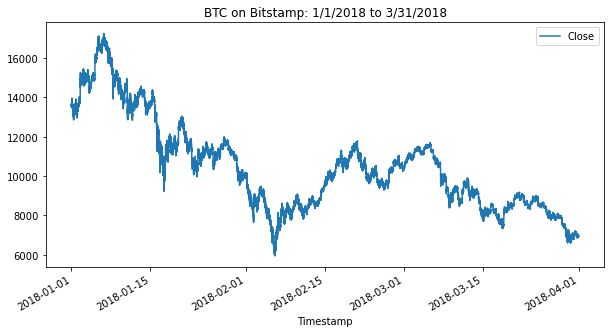

In [41]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(10,5), title="BTC on Bitstamp: 1/1/2018 to 3/31/2018")

<AxesSubplot:title={'center':' BTC on Coinbase: 1/1/2018 to 3/31/2018'}, xlabel='Timestamp'>

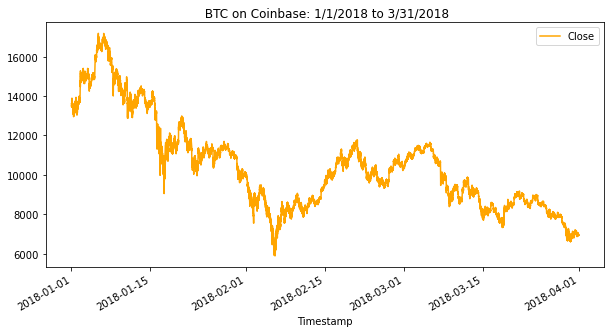

In [42]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(10,5), title=" BTC on Coinbase: 1/1/2018 to 3/31/2018", color="orange")

<AxesSubplot:title={'center':'BTC on Bitstamp Vs. Coinbase: 1/1/2018 to 3/31/2018'}, xlabel='Timestamp'>

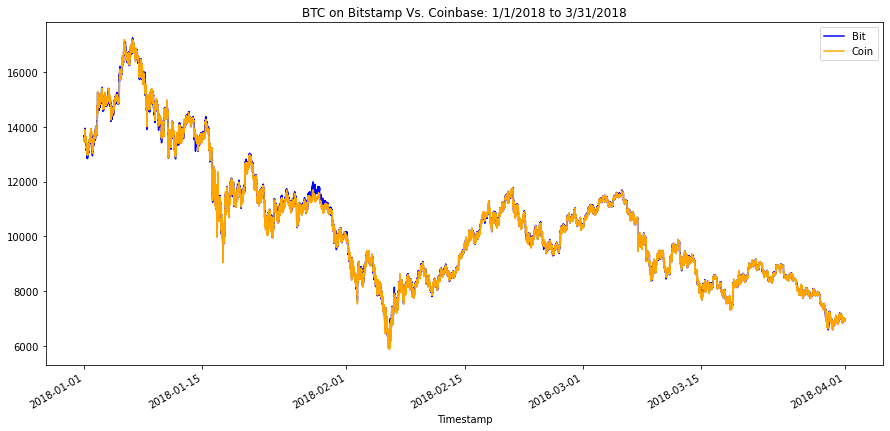

In [43]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced["Close"].plot(legend=True, figsize=(15,7), title="BTC on Bitstamp Vs. Coinbase: 1/1/2018 to 3/31/2018", color="blue", label="Bit")
coinbase_sliced["Close"].plot(legend=True, figsize=(15,7), color="orange", label="Coin")

<AxesSubplot:title={'center':'BTC on Bitstamp Vs. Coinbase: 1/1/2018 to 1/31/2018'}, xlabel='Timestamp'>

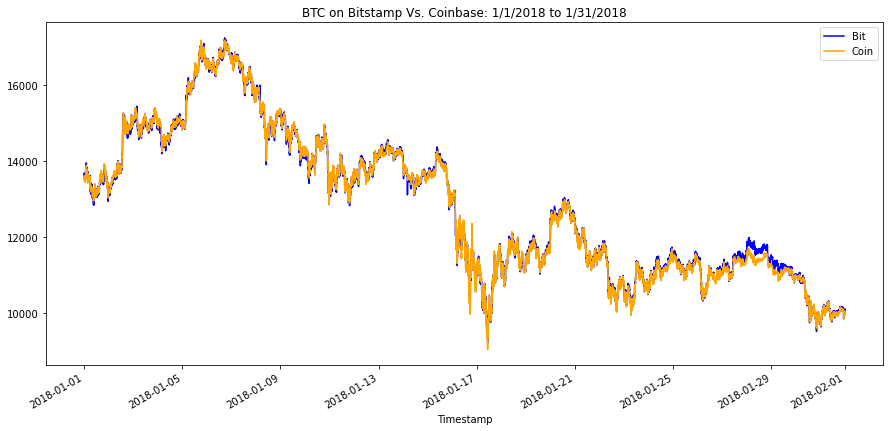

In [44]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced["Close"].loc["2018-01-01":"2018-01-31"].plot(legend=True, figsize=(15,7), title="BTC on Bitstamp Vs. Coinbase: 1/1/2018 to 1/31/2018", color="blue", label="Bit")
coinbase_sliced["Close"].loc["2018-01-01":"2018-01-31"].plot(legend=True, figsize=(15,7), color="orange", label="Coin")

<AxesSubplot:title={'center':'BTC on Bitstamp Vs. Coinbase: 2/1/2018 to 2/28/2018'}, xlabel='Timestamp'>

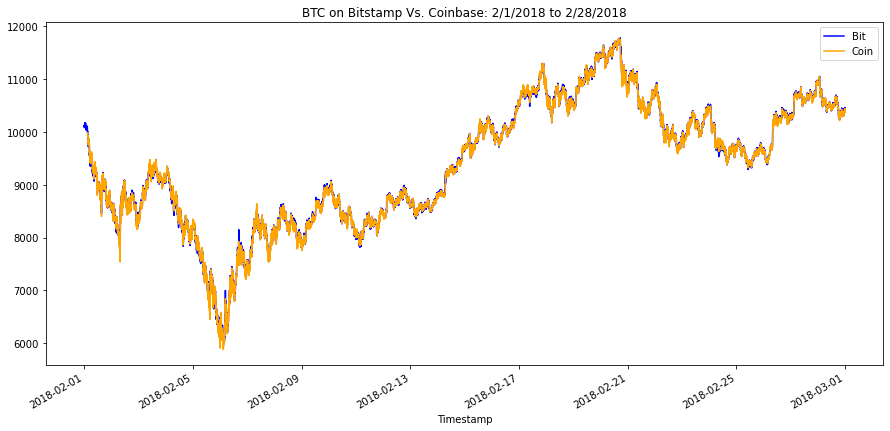

In [45]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced["Close"].loc["2018-02-01":"2018-02-28"].plot(legend=True, figsize=(15,7), title="BTC on Bitstamp Vs. Coinbase: 2/1/2018 to 2/28/2018", color="blue", label="Bit")
coinbase_sliced["Close"].loc["2018-02-01":"2018-02-28"].plot(legend=True, figsize=(15,7), color="orange", label="Coin")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, in January, specifically late January, it looks like the degree of spread between the two exchanges was more substantial than in February and March. It certainly looks like there was an arbitrage opportunity around 1/28 - 1/30. By March it looks like the two exchanges have matched up pretty evenly and the degree of spread has minimized. In January it generally looks like Bitstamp was trading higher and in February I see more areas where Coinbase was trading higher. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'BTC on Bitstamp Vs. Coinbase: 1/28/2018'}, xlabel='Timestamp'>

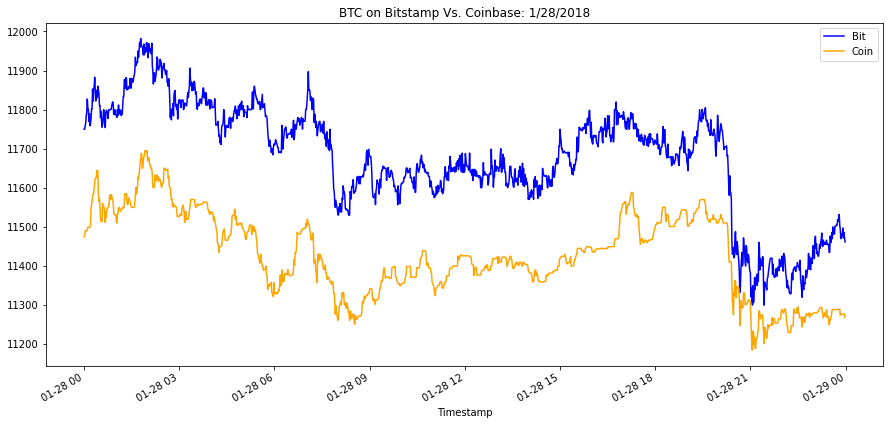

In [46]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced["Close"].loc["2018-01-28"].plot(legend=True, figsize=(15,7), title="BTC on Bitstamp Vs. Coinbase: 1/28/2018", color="blue", label="Bit")
coinbase_sliced["Close"].loc["2018-01-28"].plot(legend=True, figsize=(15,7), color="orange", label="Coin")

In [47]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced["Close"].loc["2018-01-28"] - coinbase_sliced["Close"].loc["2018-01-28"]

# Generate summary statistics for the early DataFrame
display(arbitrage_spread_early.describe())
arbitrage_spread_early.head()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
Name: Close, dtype: float64

<AxesSubplot:>

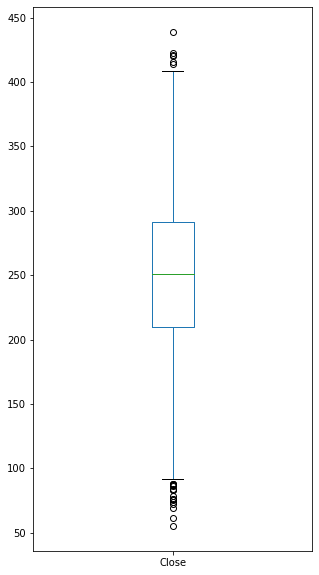

In [48]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(figsize=(5,10), kind="box")

<AxesSubplot:title={'center':'BTC on Bitstamp Vs. Coinbase: 02/04/2018'}, xlabel='Timestamp'>

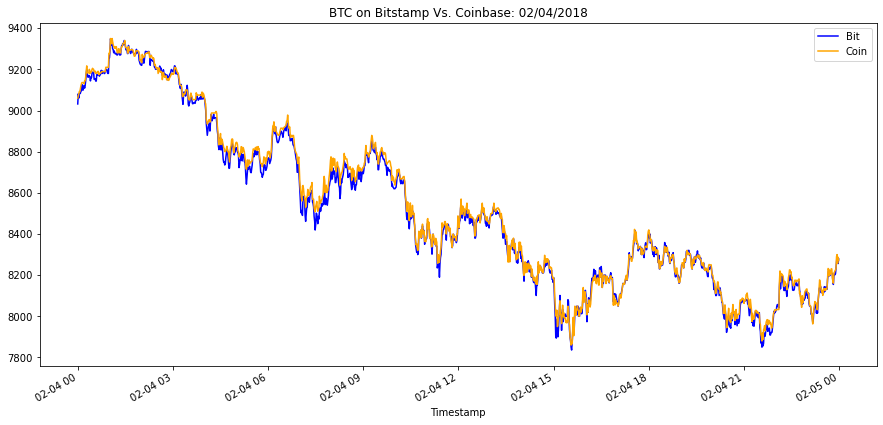

In [50]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced["Close"].loc["2018-02-04"].plot(legend=True, figsize=(15,7), title="BTC on Bitstamp Vs. Coinbase: 02/04/2018", color="blue", label="Bit")
coinbase_sliced["Close"].loc["2018-02-04"].plot(legend=True, figsize=(15,7), color="orange", label="Coin")

In [52]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced["Close"].loc["2018-02-04"] - bitstamp_sliced["Close"].loc["2018-02-04"]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1438.000000
mean       16.183561
std        21.376198
min       -47.890000
25%         1.882500
50%        15.785000
75%        28.662500
max       142.520000
Name: Close, dtype: float64

<AxesSubplot:>

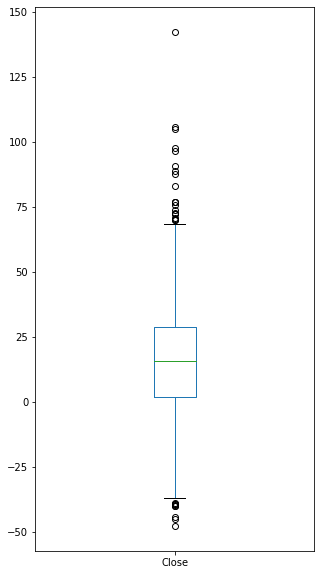

In [53]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(figsize=(5,10), kind="box")

<AxesSubplot:title={'center':'BTC on Bitstamp Vs. Coinbase: 03/14/2018'}, xlabel='Timestamp'>

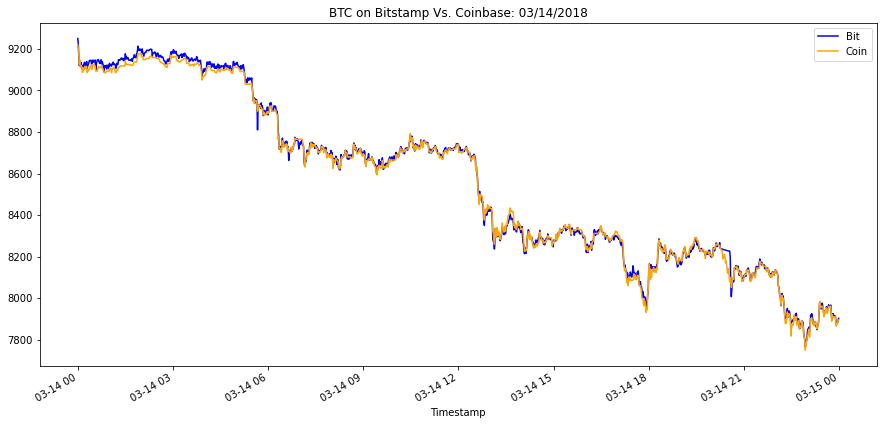

In [54]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced["Close"].loc["2018-03-14"].plot(legend=True, figsize=(15,7), title="BTC on Bitstamp Vs. Coinbase: 03/14/2018", color="blue", label="Bit")
coinbase_sliced["Close"].loc["2018-03-14"].plot(legend=True, figsize=(15,7), color="orange", label="Coin")

In [55]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced["Close"].loc["2018-03-14"] - coinbase_sliced["Close"].loc["2018-03-14"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1425.000000
mean        6.731404
std        16.322187
min       -90.010000
25%        -2.910000
50%         6.000000
75%        16.600000
max       147.650000
Name: Close, dtype: float64

<AxesSubplot:>

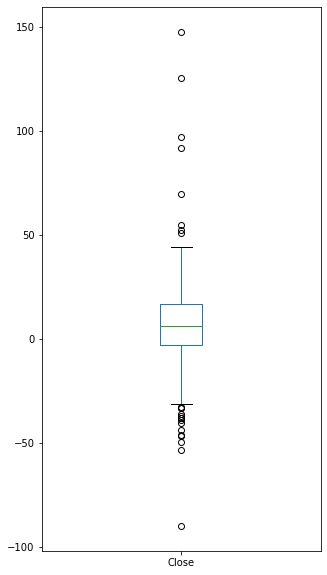

In [56]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(figsize=(5,10), kind="box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [33]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

# This is all calculated above in Step 3.

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame


In [57]:
# Early day arbitrage spread > 0.
early_boolean_filter = arbitrage_spread_early > 0
arbitrage_spread_early.loc[early_boolean_filter].describe()


count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [58]:
# Middle day arbitrage spread > 0.
middle_boolean_filter = arbitrage_spread_middle > 0
arbitrage_spread_middle.loc[middle_boolean_filter].describe()

count    1122.000000
mean       23.829456
std        17.131967
min         0.040000
25%        10.945000
50%        21.040000
75%        32.650000
max       142.520000
Name: Close, dtype: float64

In [59]:
# Late day arbitrage spread > 0.
late_boolean_filter = arbitrage_spread_late > 0
arbitrage_spread_late.loc[late_boolean_filter].describe()

count    956.000000
mean      14.774121
std       12.422690
min        0.010000
25%        5.912500
50%       11.935000
75%       21.350000
max      147.650000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [61]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / coinbase_sliced["Close"].loc["2018-01-28"]

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
                         ...   
2018-01-28 23:55:00    0.019518
2018-01-28 23:56:00    0.017302
2018-01-28 23:57:00    0.018510
2018-01-28 23:58:00    0.017303
2018-01-28 23:59:00    0.017094
Name: Close, Length: 1440, dtype: float64

In [65]:
# For the date in the middle of the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced["Close"].loc["2018-02-04"]

# Review the spread return DataFrame
spread_return_middle

Timestamp
2018-02-04 00:00:00    0.003109
2018-02-04 00:01:00         NaN
2018-02-04 00:02:00    0.002166
2018-02-04 00:03:00    0.001590
2018-02-04 00:04:00    0.000880
                         ...   
2018-02-04 23:55:00    0.002702
2018-02-04 23:56:00    0.000416
2018-02-04 23:57:00         NaN
2018-02-04 23:58:00    0.003747
2018-02-04 23:59:00         NaN
Name: Close, Length: 1438, dtype: float64

In [67]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase_sliced["Close"].loc["2018-03-14"]

# Review the spread return DataFrame
spread_return_late = spread_return_late.dropna()
spread_return_late

Timestamp
2018-03-14 00:00:00    0.003254
2018-03-14 00:01:00    0.003127
2018-03-14 00:05:00    0.001958
2018-03-14 00:06:00    0.001597
2018-03-14 00:07:00    0.000329
                         ...   
2018-03-14 23:54:00    0.001398
2018-03-14 23:55:00    0.001116
2018-03-14 23:56:00    0.000893
2018-03-14 23:57:00    0.000288
2018-03-14 23:59:00    0.000955
Name: Close, Length: 956, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [68]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early > .01

# Review the first five profitable trades
profitable_trades_early = spread_return_early.loc[profitable_trades_early]
profitable_trades_early.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [69]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle > .01

# Review the first five profitable trades
profitable_trades_middle = spread_return_middle.loc[profitable_trades_middle]
profitable_trades_middle.head()

Timestamp
2018-02-04 07:02:00    0.011368
2018-02-04 07:05:00    0.016786
2018-02-04 07:29:00    0.010544
2018-02-04 07:30:00    0.010373
2018-02-04 07:46:00    0.010583
Name: Close, dtype: float64

In [70]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late > .01

# Review the first five profitable trades
profitable_trades_late = spread_return_late.loc[profitable_trades_late]
profitable_trades_late.head()

Timestamp
2018-03-14 20:31:00    0.011296
2018-03-14 20:32:00    0.015508
2018-03-14 20:33:00    0.018276
2018-03-14 20:34:00    0.012002
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [71]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_early.describe())
display(profitable_trades_middle.describe())
profitable_trades_late.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

count    8.000000
mean     0.012206
std      0.002204
min      0.010373
25%      0.010573
50%      0.011319
75%      0.013327
max      0.016786
Name: Close, dtype: float64

count    4.000000
mean     0.014271
std      0.003244
min      0.011296
25%      0.011826
50%      0.013755
75%      0.016200
max      0.018276
Name: Close, dtype: float64

**How do the average returns compare among the three dates?**
The returns from the early day,(1/28/18), are by far the greatest of the three selected. That entire day Bitstamp was trading at a higher price than Coinbase and the arbitrage return average for the day was over 2%. This arbitrage opportunity also persisted throughout the entire day.

The middle date that I chose was 2/4/2018 and during this day it appeared to me that Coinbase was in general trading higher than Bitstamp. After narrowing down the data to include only profitable returns, we're only left with 8 arbitrage opportunities. These returns have an average of 1.2% and a maximum return of 1.67%. 

There was a small window in our late day chosen (3/14/18) to make a profit on arbitrage opportunities. Only 4 timeframes had an opporunity that was greater than 1%. The max return this day was 1.82%.

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [79]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profitable_trades_early * coinbase_sliced["Close"].loc["2018-01-28"]
profit_per_trade_early = profit_per_trade_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1378, dtype: float64

In [81]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profitable_trades_middle * bitstamp_sliced["Close"].loc["2018-02-04"]
profit_per_trade_middle = profit_per_trade_middle.dropna()
# View the middle profit DataFrame
profit_per_trade_middle

Timestamp
2018-02-04 07:02:00     96.67
2018-02-04 07:05:00    142.52
2018-02-04 07:29:00     88.77
2018-02-04 07:30:00     87.61
2018-02-04 07:46:00     90.90
2018-02-04 07:58:00     97.60
2018-02-04 15:04:00    105.01
2018-02-04 15:05:00    106.02
Name: Close, dtype: float64

In [82]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profitable_trades_late * coinbase_sliced["Close"].loc["2018-03-14"]
profit_per_trade_late = profit_per_trade_late.dropna()
# View the late profit DataFrame
profit_per_trade_late

Timestamp
2018-03-14 20:31:00     91.89
2018-03-14 20:32:00    125.63
2018-03-14 20:33:00    147.65
2018-03-14 20:34:00     97.22
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [83]:
# Generate the summary statistics for the early profit per trade DataFrame
display(profit_per_trade_early.describe())
display(profit_per_trade_middle.describe())
profit_per_trade_late.describe()

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

count      8.0000
mean     101.8875
std       17.8088
min       87.6100
25%       90.3675
50%       97.1350
75%      105.2625
max      142.5200
Name: Close, dtype: float64

count      4.000000
mean     115.597500
std       25.998666
min       91.890000
25%       95.887500
50%      111.425000
75%      131.135000
max      147.650000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

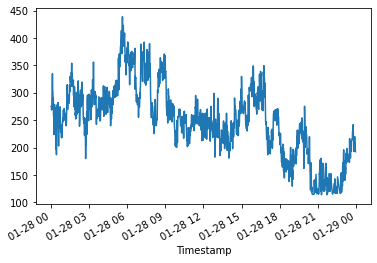

In [84]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot()

<AxesSubplot:xlabel='Timestamp'>

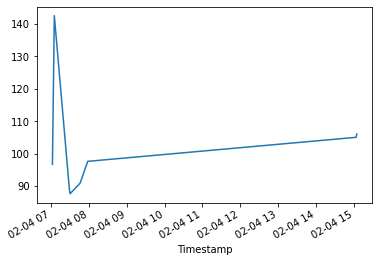

In [85]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot()

<AxesSubplot:xlabel='Timestamp'>

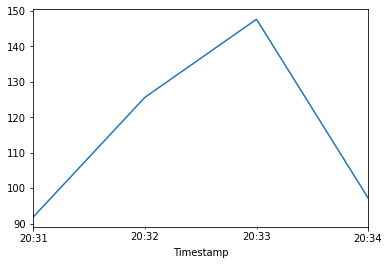

In [86]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot()

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [87]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
display(profit_per_trade_early.sum())
display(profit_per_trade_middle.sum())
profit_per_trade_late.sum()

349918.2900000001

815.1000000000022

462.3899999999976

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [88]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:xlabel='Timestamp'>

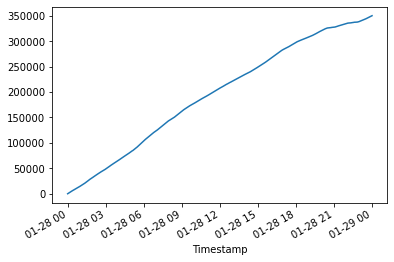

In [89]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot()

In [90]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:xlabel='Timestamp'>

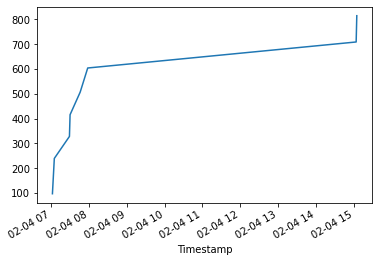

In [91]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot()

In [92]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:xlabel='Timestamp'>

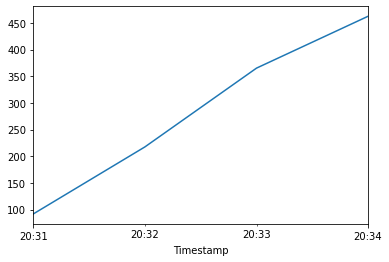

In [93]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** 
On 1/28/2018 there was a substantial arbitrage opportunity that persisted throughout the entire day. The spread between the two exchanges was larger at the beginning of the day and slightly narrowed down as the day went on. However, the opporunity for profit was there for the entire day and looking at the cumulative sum chart we can see that the gains were up and to the right for the entire day, just slightly starting to level off at the end of the day. Judging by the trend we see on 1/28, it is highly possible that further analysis of 1/29/2018 could show more arbitrage opporunities pushing into that day. Back to 1/28/2018 though - If our analysis is correct, you could have made nearly 350,000 dollars by capitalizing on the arbitrage opporunities that day.

In the middle window, 2/4/2018, it appeared that Coinbase was generally trading higher throughout the day. Early in the day the spread jumped up to a 140 dollar difference and then settled back down to be near 100 dollars for the rest of the day. There were not many arbitrage opportunities throughout the day that would have been big enough to be profitable, only 8 timeframes. The majority of the profit would have been made early in the day during the big spike to 140 dollars and then plateaued for the remainder of the day until seeing a small jump at the end of the day. The profit in our middle window would have been around 815 dollars. 

In our late window, 3/14/2018, we had the least amount of oporunities to make a profitable return, only four timeframes. This spread pattern looked more like a pyramid - the spread started low, peaked, and then dropped back down. Total profits on our final analyzed day would have been around 462 dollars. 